# Airline Passenger Satisfaction# 

# Problem Statement

This dataset contains an airline passenger satisfaction survey. What factors are highly correlated to a satisfied (or dissatisfied) passenger? Can you predict passenger satisfaction?.We have to find out weather the passenger is satisfied or not 
based on the given features in dataset

# About Dataset

Content
Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

Note that this data set was modified from this dataset by John D here. It has been cleaned up for the purposes of classification.

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"A:\Projects Machine Learning\Internship SA\Airline\Passenger-Satisfaction-Prediction\notebook\data\airline_dataset.csv",index_col = 0)
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Inflight wifi service              129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Ease of Online booking             129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Online boarding                    12988

In [5]:
df.shape   # Getting shape of train data

(129880, 23)

In [6]:
df.shape    #detting shape of test dataset

(129880, 23)

In [7]:

print(pd.isnull(df).sum())


Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64


In [8]:
# Calculating the Missing Values % contribution in Data

df_null = round(100*(df.isnull().sum())/len(df), 2)
df_null

Gender                               0.0
Customer Type                        0.0
Age                                  0.0
Type of Travel                       0.0
Class                                0.0
Flight Distance                      0.0
Inflight wifi service                0.0
Departure/Arrival time convenient    0.0
Ease of Online booking               0.0
Gate location                        0.0
Food and drink                       0.0
Online boarding                      0.0
Seat comfort                         0.0
Inflight entertainment               0.0
On-board service                     0.0
Leg room service                     0.0
Baggage handling                     0.0
Checkin service                      0.0
Inflight service                     0.0
Cleanliness                          0.0
Departure Delay in Minutes           0.0
Arrival Delay in Minutes             0.3
satisfaction                         0.0
dtype: float64

In [9]:
# Here we can see that Train data has 310 missing value in Arrival Delay in Minutes
# Here we can see that Test data has 83 missing value in Arrival Delay in Minutes
# As we observe the missing values are very less ,0.3 % compare to  dataset so we will drop the missing values

In [10]:
df= df.dropna()
df.shape

(129487, 23)

In [11]:
#To check Null values again
df_null = round(100*(df.isnull().sum())/len(df), 2)
df_null

Gender                               0.0
Customer Type                        0.0
Age                                  0.0
Type of Travel                       0.0
Class                                0.0
Flight Distance                      0.0
Inflight wifi service                0.0
Departure/Arrival time convenient    0.0
Ease of Online booking               0.0
Gate location                        0.0
Food and drink                       0.0
Online boarding                      0.0
Seat comfort                         0.0
Inflight entertainment               0.0
On-board service                     0.0
Leg room service                     0.0
Baggage handling                     0.0
Checkin service                      0.0
Inflight service                     0.0
Cleanliness                          0.0
Departure Delay in Minutes           0.0
Arrival Delay in Minutes             0.0
satisfaction                         0.0
dtype: float64

In [12]:
df.duplicated().sum()

0

In [13]:
# there are no Duplicate values in data

In [14]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [15]:
# saprate catigorical and numerical features
catigorical_features = df.select_dtypes(include="object").columns
numerical_features = df.select_dtypes(exclude="object").columns

In [16]:
catigorical_features

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], dtype='object')

In [17]:
numerical_features

Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

In [18]:
for i in catigorical_features:
    print(i,df[i].unique())
    print()
    print("------------------------------------------")
    print()

Gender ['Male' 'Female']

------------------------------------------

Customer Type ['Loyal Customer' 'disloyal Customer']

------------------------------------------

Type of Travel ['Personal Travel' 'Business travel']

------------------------------------------

Class ['Eco Plus' 'Business' 'Eco']

------------------------------------------

satisfaction ['neutral or dissatisfied' 'satisfied']

------------------------------------------



In [19]:
df.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000
mean,39.428761,1190.210662,2.728544,3.057349,2.756786,2.976909,3.204685,3.252720,3.441589,3.358067,3.383204,3.351078,3.631886,3.306239,3.642373,3.286222,14.643385,15.091129
std,15.117597,997.560954,1.329235,1.526787,1.401662,1.278506,1.329905,1.350651,1.319168,1.334149,1.287032,1.316132,1.180082,1.266146,1.176614,1.313624,37.932867,38.465650
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


# Data Visualization

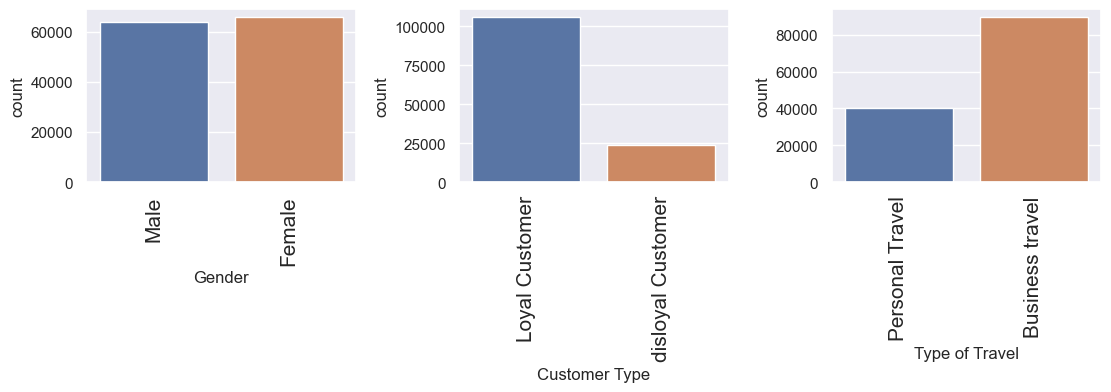

In [20]:
# For Categorical Features 

plt.style.use('fivethirtyeight')
sns.set(rc={"figure.figsize":(15,6)})

colmns1 = ['Gender', 'Customer Type', 'Type of Travel']

for i in range(0,len(colmns1)):
    plt.subplot(2,4,i+1)
    sns.countplot(x=df[colmns1[i]])
    plt.xticks(size=15,rotation=90)
    plt.tight_layout()

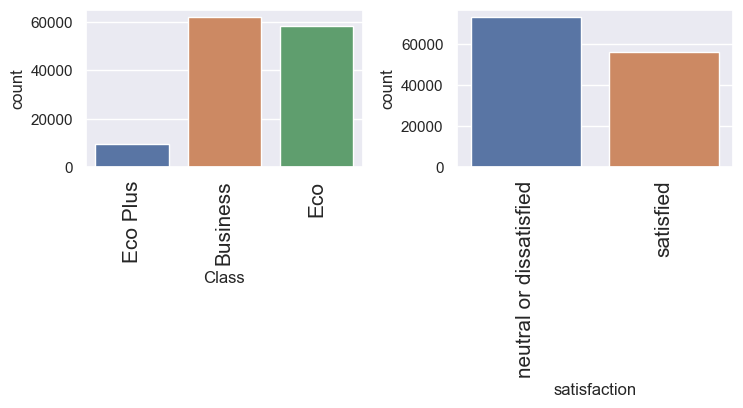

In [21]:
plt.style.use('fivethirtyeight')
sns.set(rc={"figure.figsize":(15,6)})

colmns1 = ['Class', 'satisfaction']

for i in range(0,len(colmns1)):
    plt.subplot(2,4,i+1)
    sns.countplot(x=df[colmns1[i]])
    plt.xticks(size=15,rotation=90)
    plt.tight_layout()

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Flight Distance'}>,
        <AxesSubplot:title={'center':'Inflight wifi service'}>,
        <AxesSubplot:title={'center':'Departure/Arrival time convenient'}>],
       [<AxesSubplot:title={'center':'Ease of Online booking'}>,
        <AxesSubplot:title={'center':'Gate location'}>,
        <AxesSubplot:title={'center':'Food and drink'}>,
        <AxesSubplot:title={'center':'Online boarding'}>],
       [<AxesSubplot:title={'center':'Seat comfort'}>,
        <AxesSubplot:title={'center':'Inflight entertainment'}>,
        <AxesSubplot:title={'center':'On-board service'}>,
        <AxesSubplot:title={'center':'Leg room service'}>],
       [<AxesSubplot:title={'center':'Baggage handling'}>,
        <AxesSubplot:title={'center':'Checkin service'}>,
        <AxesSubplot:title={'center':'Inflight service'}>,
        <AxesSubplot:title={'center':'Cleanliness'}>],
       [<AxesSubplot:title={'center':'Departure 

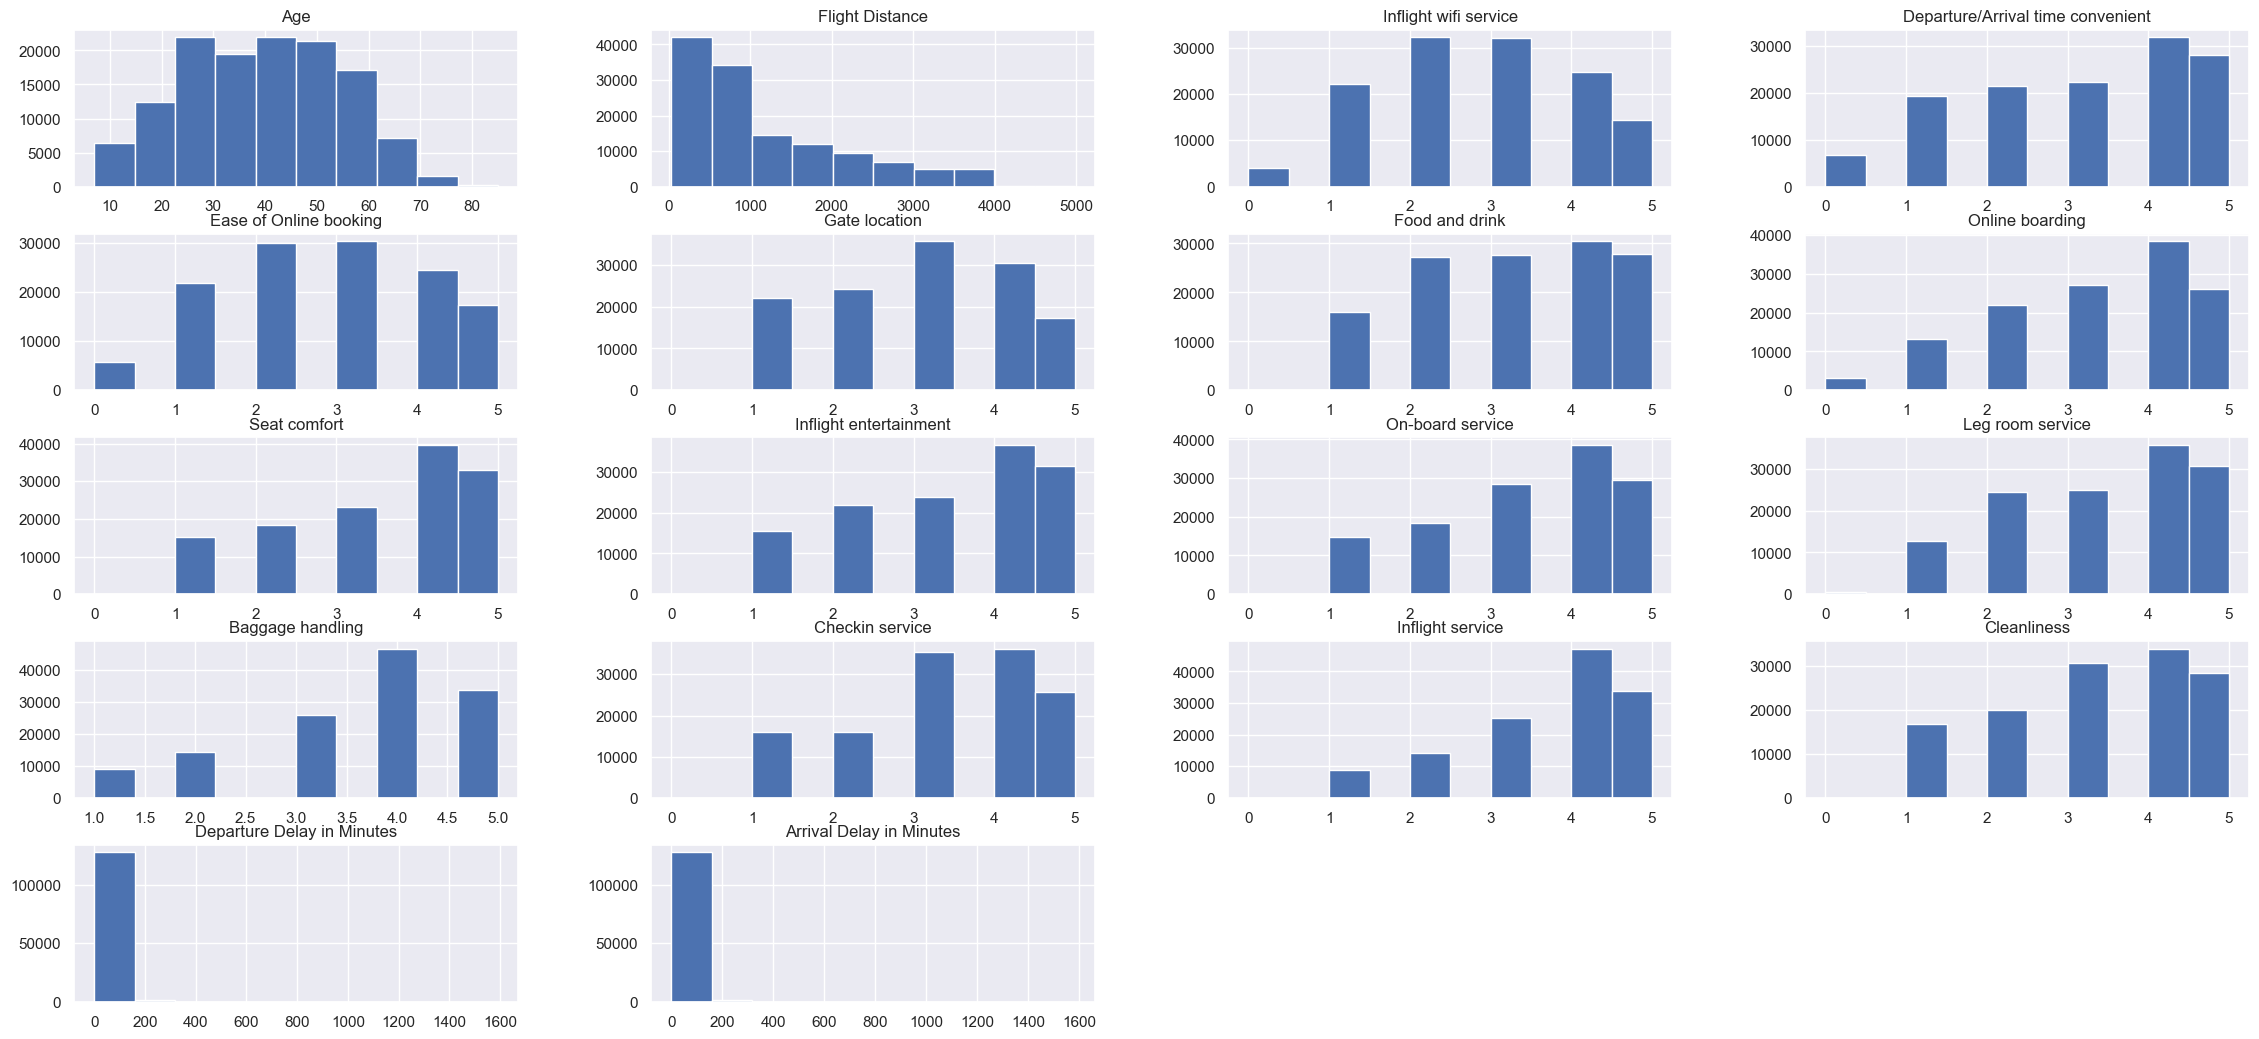

In [22]:
df.hist(figsize=(25,12))

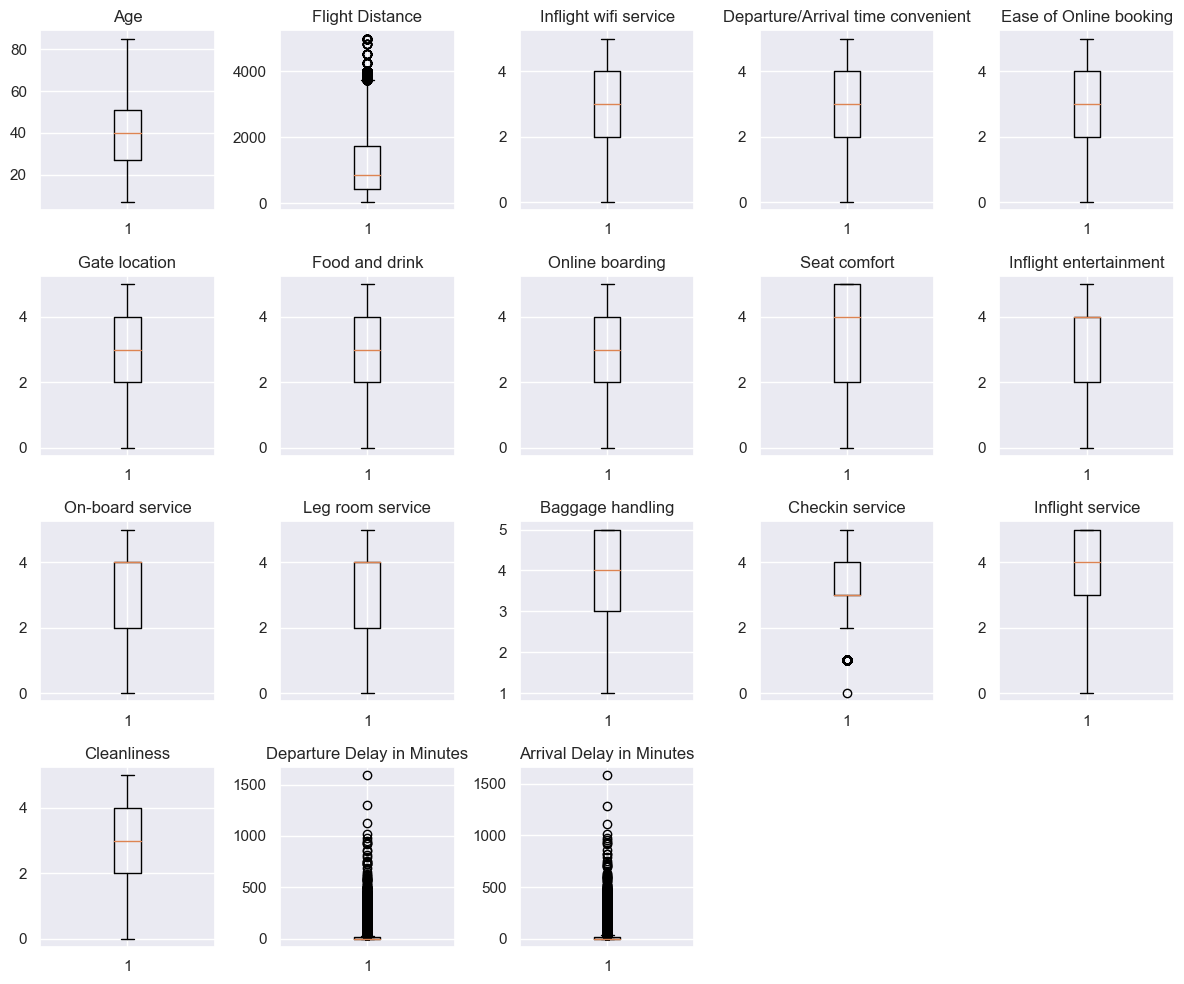

In [23]:
plt.figure(figsize=(12, 10))  

# Iterate over the numerical columns and create a box plot for each column
for i, column in enumerate(numerical_features, 1):
    plt.subplot(4, 5, i)  
    plt.boxplot(df[column])
    plt.title(column)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [24]:
# As we see there are outliers in columns ='Flight Distance',Checkin service,
#'Departure Delay in Minutes', 'Arrival Delay in Minutes'

<AxesSubplot:xlabel='satisfaction'>

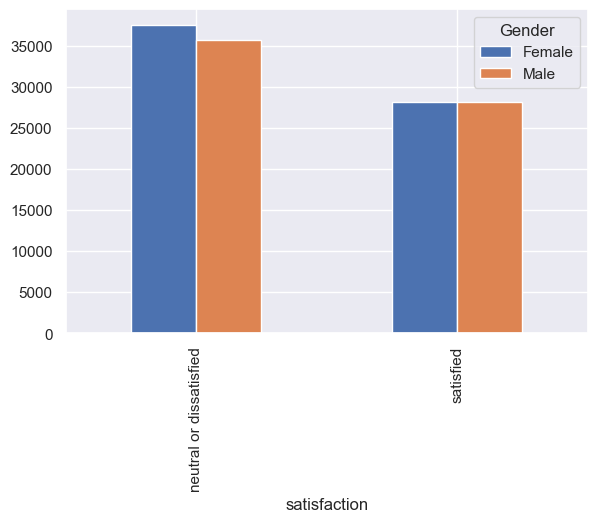

In [25]:
fig, ax = plt.subplots(figsize=(6, 4))
gender= pd.crosstab(df['satisfaction'],df['Gender']) # There is no significance of gender in customer satisfaction 
gender.plot.bar(ax=ax)

<AxesSubplot:xlabel='satisfaction'>

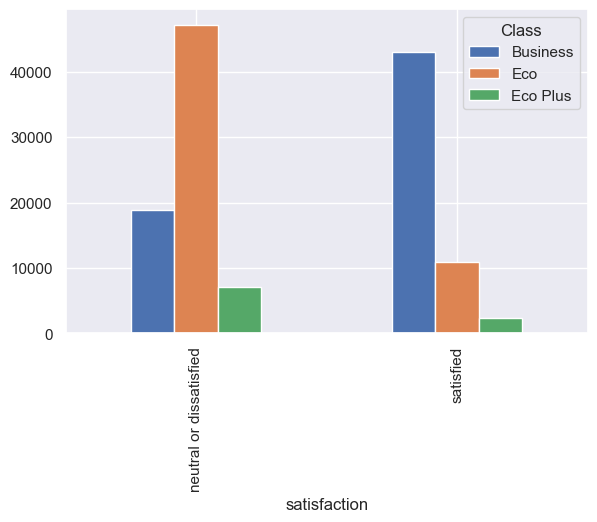

In [26]:
fig, ax = plt.subplots(figsize=(6, 4))  

is_class= pd.crosstab(df['satisfaction'],df['Class']) 
is_class.plot.bar(ax=ax)

In [27]:
# Here we see that Business class is more satisfied  in other hand Eco class is dissatisfied or netural

# Feature Extraction

<AxesSubplot:>

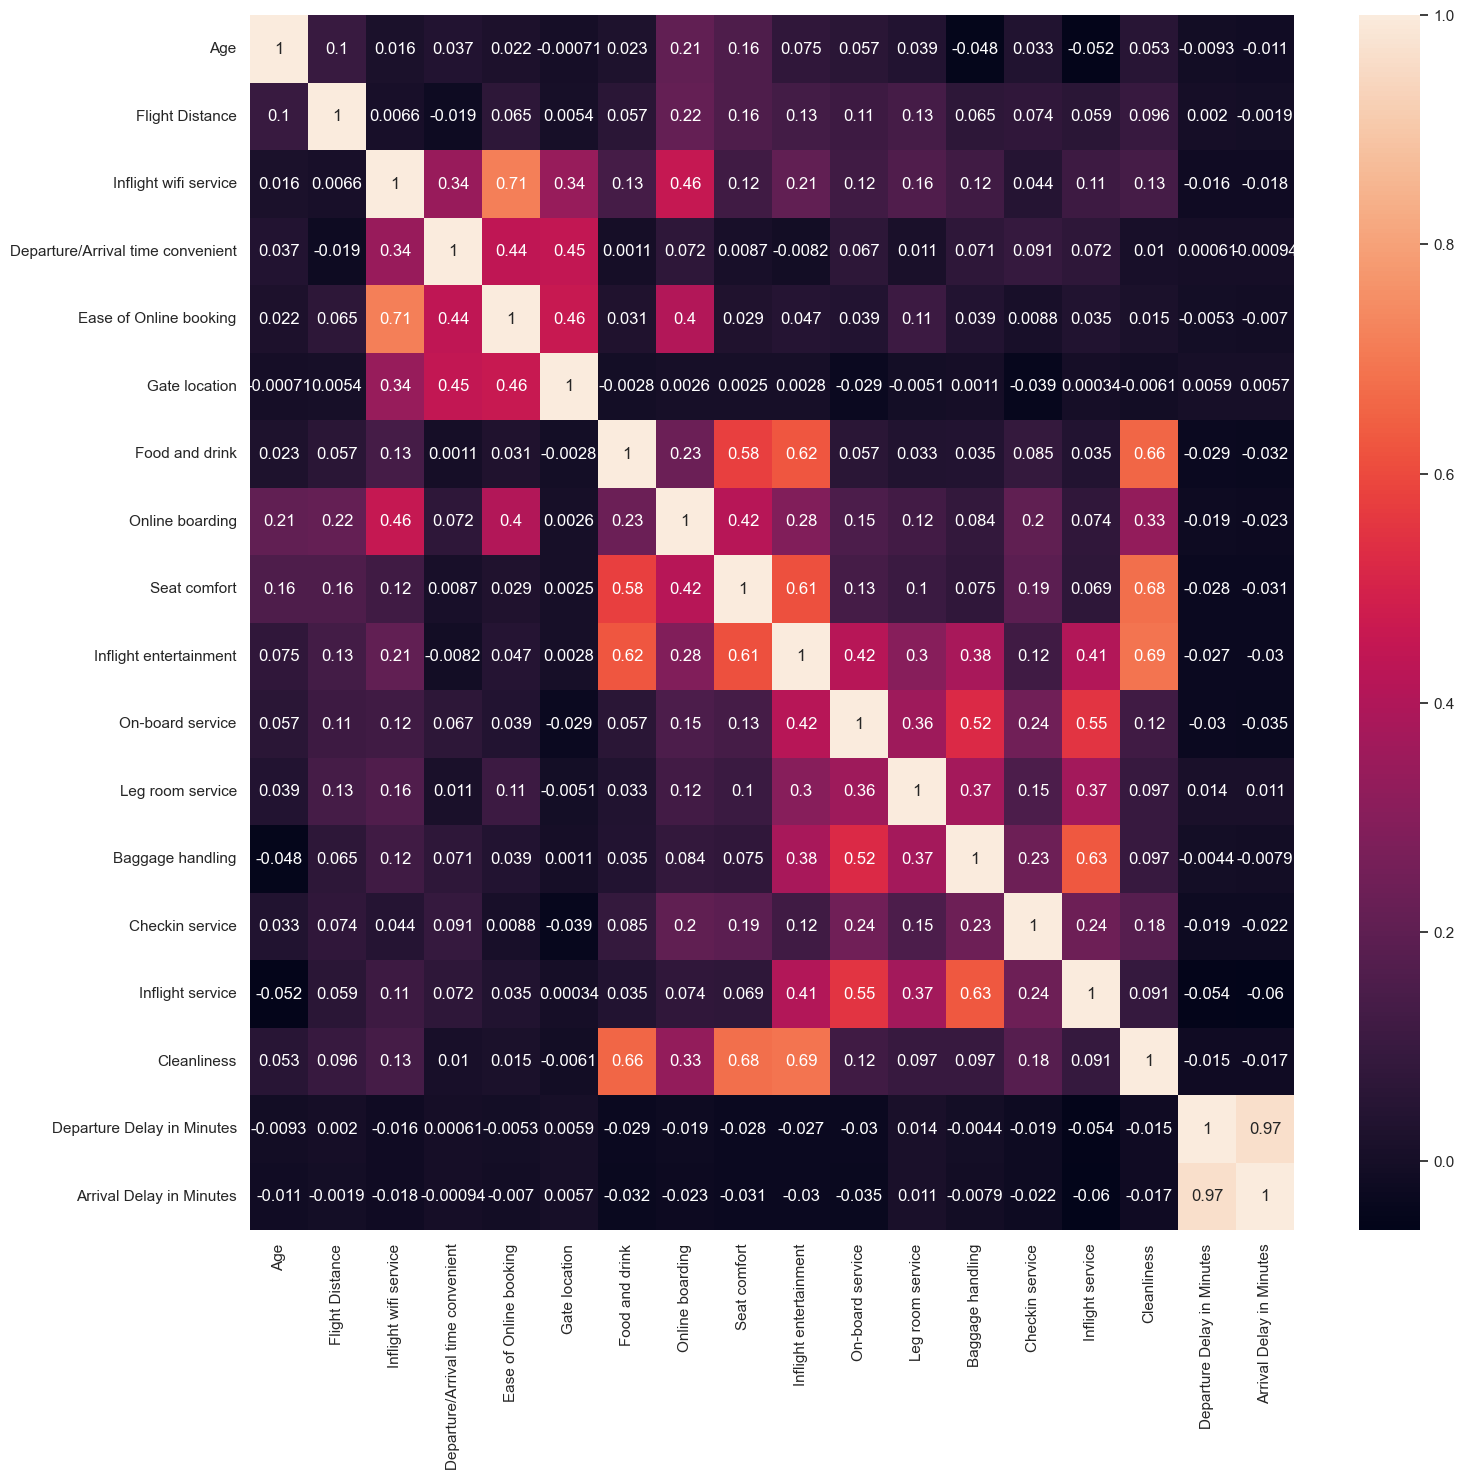

In [28]:
plt.rcParams['figure.figsize']=(15,15)
sns.heatmap(df.corr(), annot=True)

In [29]:
# from above correlation Matrix we see that columns 'Id','Departure Delay in Minutes', 'Arrival Delay in Minutes'
#'Gate location' are not having much impact on data so we remove those columns 

In [30]:
df.drop(['Departure Delay in Minutes', 'Arrival Delay in Minutes','Gate location'],axis=1,inplace=True)

In [31]:

numerical_features = df.select_dtypes(exclude="object").columns

In [32]:
#To check Multicolinearity

import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Extract the numerical features from the DataFrame


numerical_features = df.select_dtypes(include=['int', 'float']).columns

# Create a new DataFrame with only the numerical features
df_numerical = df[numerical_features]

# Add a constant column to the numerical features
X = sm.add_constant(df_numerical)

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the VIF values
print(vif)


                              Feature        VIF
0                               const  34.852648
1                                 Age   1.095762
2                     Flight Distance   1.094014
3               Inflight wifi service   2.376966
4   Departure/Arrival time convenient   1.324831
5              Ease of Online booking   2.429353
6                      Food and drink   2.165842
7                     Online boarding   1.792894
8                        Seat comfort   2.368827
9              Inflight entertainment   3.800129
10                   On-board service   1.755979
11                   Leg room service   1.299290
12                   Baggage handling   1.893537
13                    Checkin service   1.213727
14                   Inflight service   2.053212
15                        Cleanliness   2.848928


In [33]:
# Here we can see there is no multicolliniarity as vif value < 5

# Outlier Removal

In [34]:
# As we see there are outliers in columns ='Flight Distance',Checkin service,
#'Departure Delay in Minutes', 'Arrival Delay in Minutes'

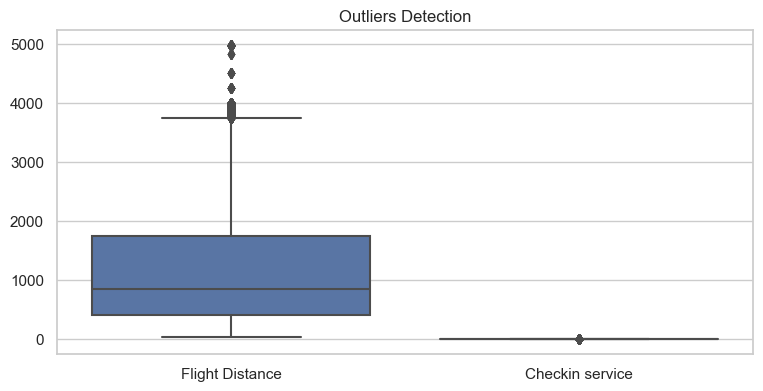

In [35]:
import seaborn as sns


columns_to_plot = ['Flight Distance', 'Checkin service']

plt.figure(figsize=(8, 4))

sns.set(style="whitegrid")
sns.boxplot(data=df[columns_to_plot])


plt.title("Outliers Detection")


plt.show()


In [36]:
#Removing outliers in Flight Distance column and dropping Checkin service


def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df


df = remove_outliers(df, 'Flight Distance')


In [37]:
df.shape

(126640, 20)

# DataFrame Split
#Split Dataframe to X and y

#Here we set a variable X i.e, independent columns, and a variable y i.e, dependent column as the “satisfaction” column.

In [38]:
from sklearn.model_selection import train_test_split
X = df.drop(['satisfaction'], axis=1)
y = df['satisfaction']

 **Check all columns which are in Train data set**

In [39]:
all_columns  = list(X.columns)
print(all_columns) 
len(all_columns)

['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']


19

Checking for Unique variables in each column

In [40]:
cat_features = [feature for feature in X.columns if X[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))

Num of Categorical Features : 4


Checking for Unique variables in each column

In [41]:
for feature in cat_features:
    print(feature,':', X[feature].nunique())

Gender : 2
Customer Type : 2
Type of Travel : 2
Class : 3


In [42]:
cat_features


['Gender', 'Customer Type', 'Type of Travel', 'Class']

In [43]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

# Define the feature groups
num_features = [feature for feature in X.columns if X[feature].dtype != 'O']
oh_columns = ['Gender', 'Customer Type', 'Type of Travel']
ordinal_columns = ['Class']

# Define the transformers
numeric_transformer = StandardScaler()
ordinal_transformer = OrdinalEncoder()
oh_transformer = OneHotEncoder(drop='first')

# Create the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('ordinal', ordinal_transformer, ordinal_columns),
        ('oh', oh_transformer, oh_columns),
        ('num', numeric_transformer, num_features)
    ]
)

# Fit and transform the data using the ColumnTransformer
X = preprocessor.fit_transform(X)


In [44]:
X

array([[ 2.        ,  1.        ,  0.        , ...,  0.55052727,
         1.15571042,  1.30714755],
       [ 0.        ,  1.        ,  1.        , ..., -1.81694066,
         0.30636027, -1.73345357],
       [ 0.        ,  0.        ,  0.        , ...,  0.55052727,
         0.30636027,  1.30714755],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  1.33968325,
         0.30636027, -0.97330329],
       [ 0.        ,  1.        ,  0.        , ...,  0.55052727,
         1.15571042,  0.54699727],
       [ 1.        ,  0.        ,  0.        , ..., -1.81694066,
        -2.24169015, -1.73345357]])

In [45]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Separate the target variable
y = df['satisfaction']

# Separate the features (X)
X = df.drop('satisfaction', axis=1)

# Define the feature groups
num_features = [feature for feature in X.columns if X[feature].dtype != 'O']
oh_columns = ['Gender', 'Customer Type', 'Type of Travel']
ordinal_columns = ['Class']

# Create the transformers
numeric_transformer = StandardScaler()
ordinal_transformer = OrdinalEncoder()
oh_transformer = OneHotEncoder(drop='first')

# Create the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('ordinal', ordinal_transformer, ordinal_columns),
        ('oh', oh_transformer, oh_columns),
        ('num', numeric_transformer, num_features)
    ]
)

# Fit and transform the features (X)
X = preprocessor.fit_transform(X)

# Create a LabelEncoder object for the target variable
le = LabelEncoder()

# Encode the target variable
y = le.fit_transform(y)



In [46]:
X

array([[ 2.        ,  1.        ,  0.        , ...,  0.55052727,
         1.15571042,  1.30714755],
       [ 0.        ,  1.        ,  1.        , ..., -1.81694066,
         0.30636027, -1.73345357],
       [ 0.        ,  0.        ,  0.        , ...,  0.55052727,
         0.30636027,  1.30714755],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  1.33968325,
         0.30636027, -0.97330329],
       [ 0.        ,  1.        ,  0.        , ...,  0.55052727,
         1.15571042,  0.54699727],
       [ 1.        ,  0.        ,  0.        , ..., -1.81694066,
        -2.24169015, -1.73345357]])

In [47]:
y

array([0, 0, 1, ..., 0, 1, 0])

In [48]:
import pickle
pickle.dump(preprocessor, open('preprocess.pkl', 'wb'))

In [49]:
df.shape

(126640, 20)

In [50]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=36)
X_train.shape, X_test.shape

((94980, 19), (31660, 19))

# Model Selection
Here should understand the Various Classification models with default values from these models we can choose top 4 with Highest Accuracy score and proceed with HyperParameter Tuning

In [51]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [53]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
     "CatBoosting Classifier": CatBoostClassifier(verbose=False),
     "Support Vector Classifier": SVC(),
    "AdaBoost Classifier": AdaBoostClassifier()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall


    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    
    print('='*35)
    print('\n')

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9617
- F1 score: 0.9616
- Precision: 0.9734
- Recall: 0.9359


Naive Bayes
Model performance for Training set
- Accuracy: 0.8662
- F1 score: 0.8656
- Precision: 0.8631
- Recall: 0.8161
----------------------------------
Model performance for Test set
- Accuracy: 0.8641
- F1 score: 0.8636
- Precision: 0.8600
- Recall: 0.8143


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9430
- F1 score: 0.9429
- Precision: 0.9447
- Recall: 0.9204
----------------------------------
Model performance for Test set
- Accuracy: 0.9402
- F1 score: 0.9401
- Precision: 0.9433
- Recall: 0.9150


Logistic Regression
Model performance for Training set
- Accuracy: 0.8746
- F1 score: 0.8742
- Precision: 0.8684
- Recall: 0.8324
----------------------------------
Model performance for Test set
-

# Hyper Parameter Tuning¶

In [54]:
knn_params = {"n_neighbors": [2, 3, 10, 20, 40, 50]}

rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

xgboost_params = {"learning_rate": [0.1, 0.01],
                  "max_depth": [5, 8, 12, 20, 30],
                  "n_estimators": [100, 200, 300],
                  "colsample_bytree": [0.5, 0.8, 1, 0.3, 0.4]}

cat_params = {"learning_rate": [0.1, 0.01],
              "max_depth": [5, 8, 12, 20, 30]}

In [55]:
randomcv_models = [('KNN', KNeighborsClassifier(), knn_params),
                   ("RF", RandomForestClassifier(), rf_params),
                   ('XGBoost', XGBClassifier(), xgboost_params),
                   ('CatBoost', CatBoostClassifier(verbose=False), cat_params)
                   ]

In [56]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    rf_random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    rf_random.fit(X_train, y_train)
    model_param[name] = rf_random. best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
---------------- Best Params for KNN -------------------
{'n_neighbors': 2}
---------------- Best Params for RF -------------------
{'n_estimators': 500, 'min_samples_split': 8, 'max_features': 8, 'max_depth': None}
---------------- Best Params for XGBoost -------------------
{'n_estimators': 300, 'max_depth': 8, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
---------------- Best Params for CatBoost -------------------
{'max_depth': 12, 'learning_rate': 0.01}


# Models Re-Trained with Best Parameters¶

In [57]:
from sklearn.metrics import roc_auc_score,roc_curve
models = {
    "Random Forest": RandomForestClassifier(n_estimators=500, min_samples_split=8, max_features= 8, max_depth= None),
    "K-Neighbors Classifier": KNeighborsClassifier(n_neighbors=2),
    "XGBClassifier": XGBClassifier(n_estimators= 300, max_depth= 8, learning_rate= 0.1, colsample_bytree= 0.8, n_jobs=-1), 
    "CatBoosting Classifier": CatBoostClassifier(max_depth= 12, learning_rate= 0.01,verbose=False),
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)

    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc



    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
    
    print('='*35)
    print('\n')

Random Forest
Model performance for Training set
- Accuracy: 0.9906
- F1 score: 0.9905
- Precision: 0.9958
- Recall: 0.9821
- Roc Auc Score: 0.9895
----------------------------------
Model performance for Test set
- Accuracy: 0.9635
- F1 score: 0.9634
- Precision: 0.9761
- Recall: 0.9375
- Roc Auc Score: 0.9602


K-Neighbors Classifier
Model performance for Training set
- Accuracy: 0.9541
- F1 score: 0.9537
- Precision: 1.0000
- Recall: 0.8926
- Roc Auc Score: 0.9463
----------------------------------
Model performance for Test set
- Accuracy: 0.9152
- F1 score: 0.9141
- Precision: 0.9667
- Recall: 0.8300
- Roc Auc Score: 0.9043


XGBClassifier
Model performance for Training set
- Accuracy: 0.9845
- F1 score: 0.9845
- Precision: 0.9915
- Recall: 0.9721
- Roc Auc Score: 0.9829
----------------------------------
Model performance for Test set
- Accuracy: 0.9628
- F1 score: 0.9627
- Precision: 0.9727
- Recall: 0.9392
- Roc Auc Score: 0.9598


CatBoosting Classifier
Model performance for T

<Figure size 1500x1500 with 0 Axes>

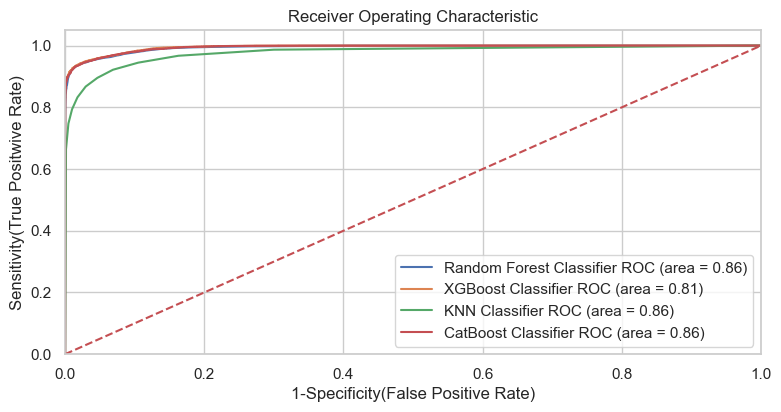

In [60]:
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()
plt.figure(figsize=(8, 4))
# Add the models to the list that you want to view on the ROC plot
auc_models = [
{
    'label': 'Random Forest Classifier',
    'model': RandomForestClassifier(n_estimators=1000, min_samples_split=2, max_features= 'auto', max_depth= None),
    'auc': 0.8618
},
{
    'label': 'XGBoost Classifier',
    'model': XGBClassifier(n_estimators= 200, max_depth= 20, learning_rate= 0.1, colsample_bytree= 0.8, n_jobs=-1),
    'auc': 0.8073
},
{
    'label': 'KNN Classifier',
    'model': KNeighborsClassifier(n_neighbors=10),
    'auc': 0.8629 
},
{
    'label': 'CatBoost Classifier',
    'model': CatBoostClassifier(max_depth= 12, learning_rate= 0.1,verbose=False),
    'auc': 0.8615
},
    
]

# Below for loop iterates through your models list
for m in auc_models:
    model = m['model'] # select the model
    model.fit(X_train, y_train) # train the model
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], m['auc']))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positwive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
#plt.savefig(r"./images/roc_auc/auc.png")
plt.show()   # Display

In [61]:
best_xgb = XGBClassifier(n_estimators= 200, max_depth= 20, learning_rate= 0.1, colsample_bytree= 0.8, n_jobs=-1)
best_xgb = best_xgb.fit(X_train,y_train)
xgb_pred = best_xgb.predict(X_test)
score = accuracy_score(y_test,xgb_pred)
cr = classification_report(y_test,xgb_pred)

print("FINAL XGB")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

FINAL XGB
Accuracy Score value: 0.9629
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     18140
           1       0.97      0.94      0.96     13520

    accuracy                           0.96     31660
   macro avg       0.96      0.96      0.96     31660
weighted avg       0.96      0.96      0.96     31660



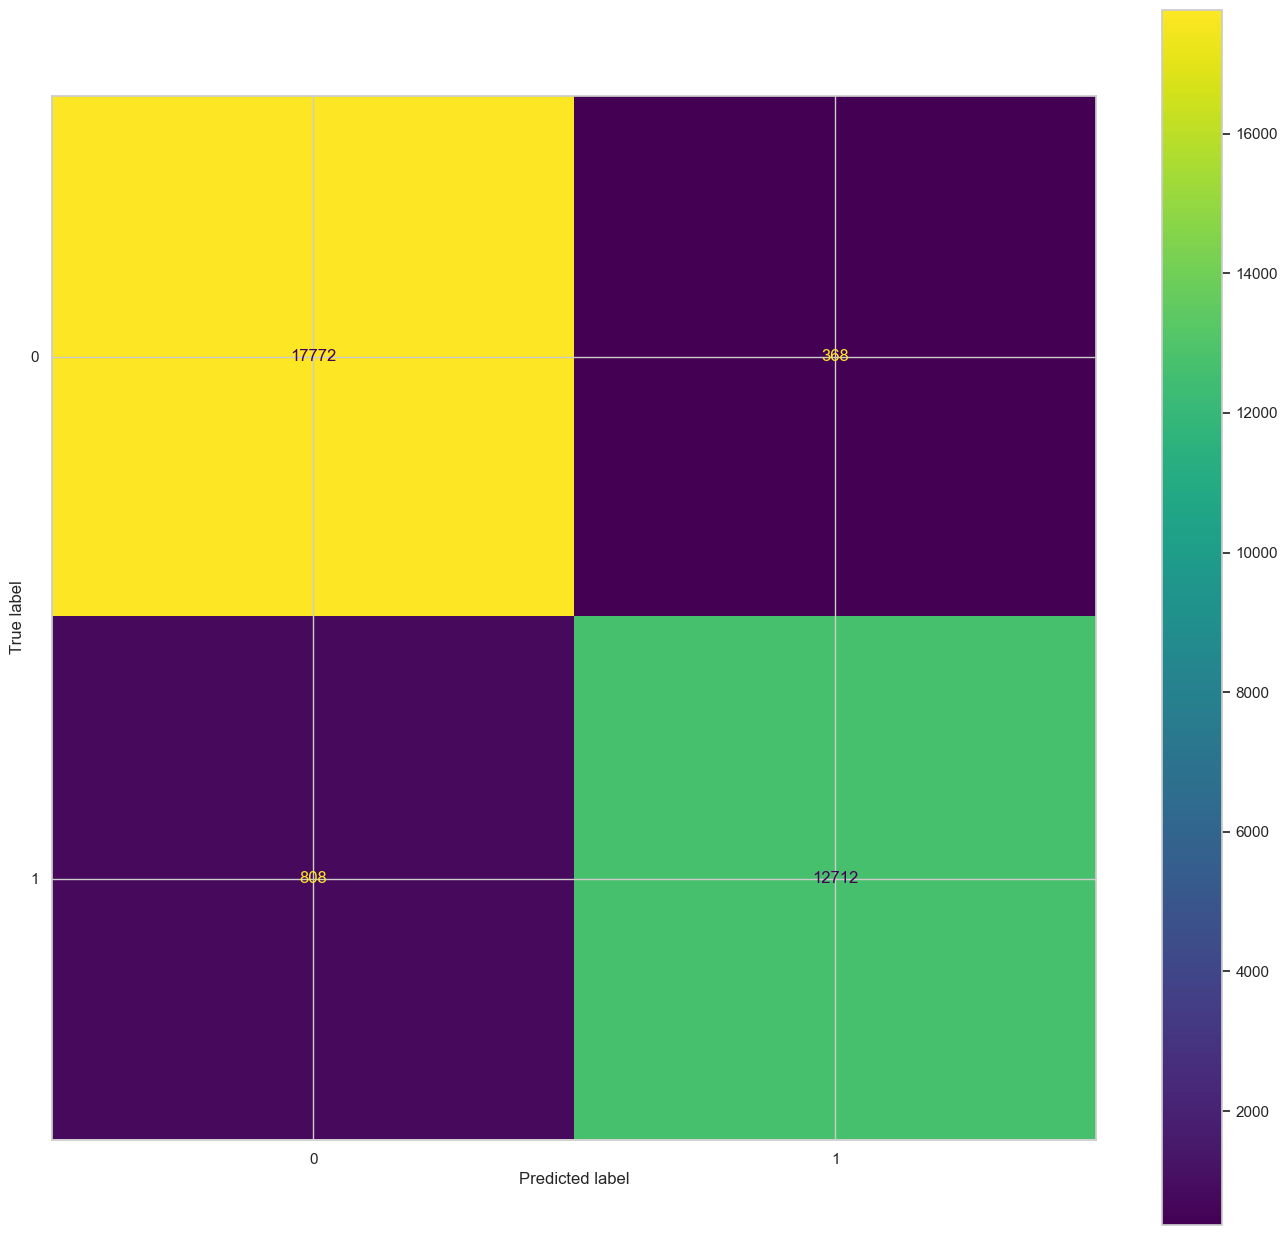

In [68]:

from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(best_xgb, X_test, y_test)

In [69]:
import pickle
 
# Save the trained model as a pickle file.
pickle.dump(best_xgb, open('classificationmodelXGB.pkl', 'wb'))

In [ ]:
best_cgb = CatBoostClassifier(max_depth= 12, learning_rate= 0.1,verbose=False)
best_cgb = best_cgb.fit(X_train,y_train)
cgb_pred = best_cgb.predict(X_test)
score1 = accuracy_score(y_test,cgb_pred)
cr1 = classification_report(y_test,cgb_pred)

print("FINAL CatBoost")
print ("Accuracy Score value: {:.4f}".format(score1))
print (cr1) 